<a href="https://colab.research.google.com/github/Yonatan-Awlachew/DataMining-Project/blob/main/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing
Purpose: Prepare the data for further analysis by cleaning, transforming, and reducing it. It includes the following Process:
*   Handling missing values

*   Outlier detection and Handling

*   Correlation Heatmap and Mutual Information Scores

*   Feature Engineering

*   Standardization


### Importing Python Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

### Loading The Dataset

In [2]:
df = pd.read_csv('Cleaned_dataset.csv')
df.head()

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Fertilisers_Cost(Million euro),Plant_Protection_Cost(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro)
0,1982,5344.2,1172.22,8196.20,28506.54,4260.27,14075.92,1672.50,839.12,150.34,45878.96
1,1983,5350.8,1214.53,8338.37,30806.63,4320.04,14272.67,1565.36,905.84,158.50,48355.67
2,1984,5289.3,1252.31,8402.90,28847.94,4341.71,14289.33,1703.82,1038.38,150.69,46485.19
3,1985,4994.1,1270.15,8729.80,29000.62,4380.38,14247.84,1740.23,1036.94,150.50,46623.95
4,1986,5026.3,1242.30,8745.40,29511.79,4352.23,14042.18,1729.79,1125.54,151.39,46996.19


## Handling Missing Values

### Check if there is Missing Values

In [3]:
df.isnull().sum()

,0
TIME_PERIOD,0
Crop_Production(1000 ha),0
Meat_Production(1000 tonnes),0
Milk_Production(1000 tonnes),3
Crop_Economy(Million euro),0
Milk_Economy(Million euro),0
Animal_Economy(Million euro),0
Fertilisers_Cost(Million euro),0
Plant_Protection_Cost(Million euro),0
Agriculture_Subsidies(Million euro),0


### Handling missing Values for Milk production Using Linear Interpolation

In [4]:
df['Milk_Production(1000 tonnes)'] = df['Milk_Production(1000 tonnes)'].interpolate(method='linear')

Checking if it is fixed or not

In [5]:
df[df['Milk_Production(1000 tonnes)'].isnull()]

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Fertilisers_Cost(Million euro),Plant_Protection_Cost(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro)


## Outlier Detection and Handling


### Box Plot for all Columns

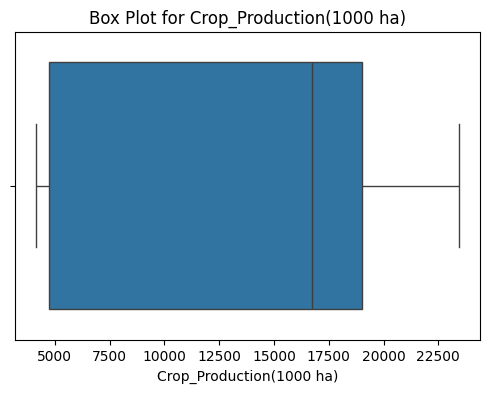

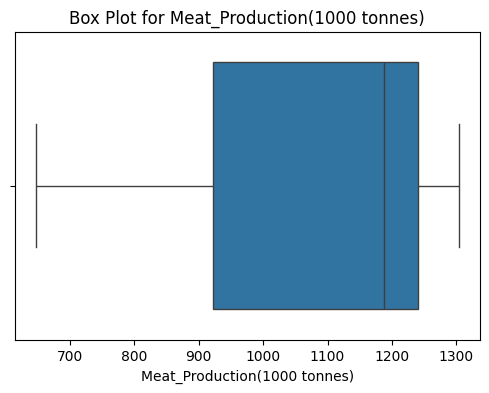

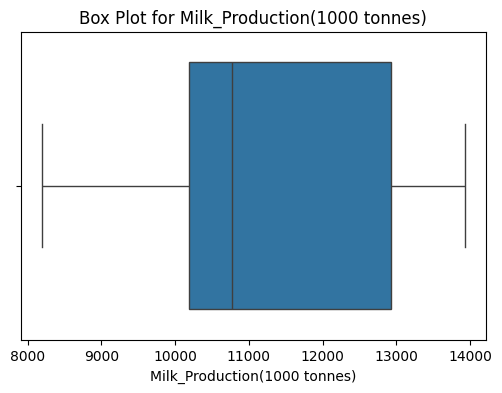

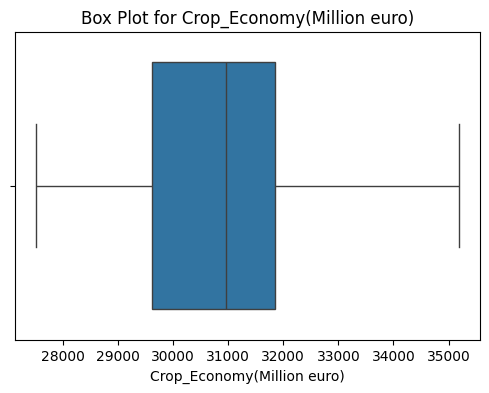

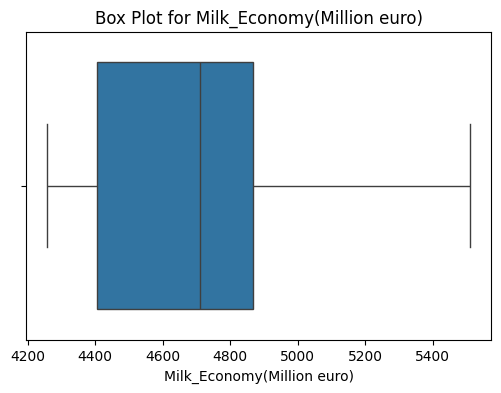

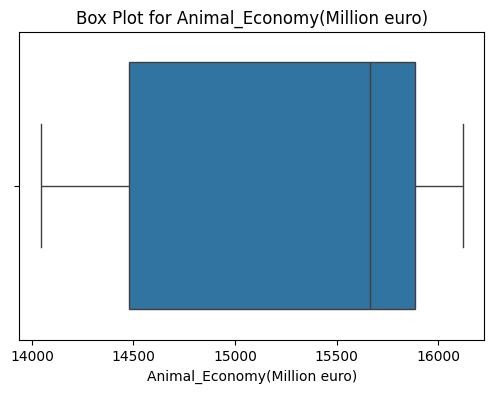

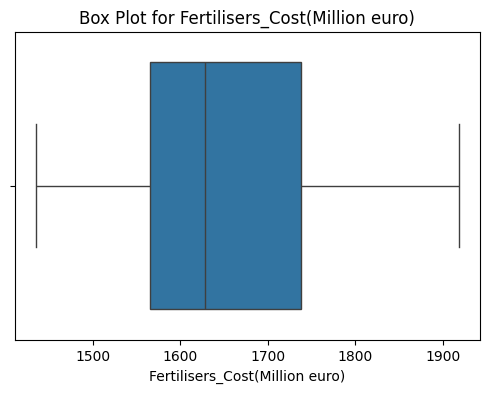

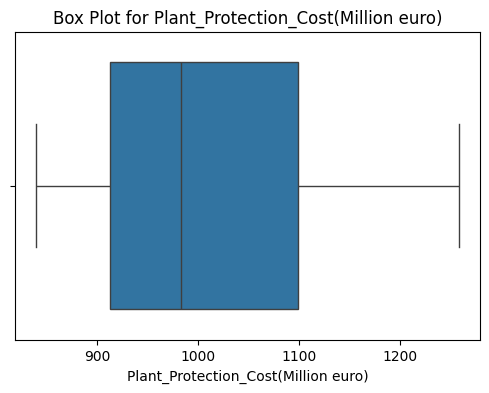

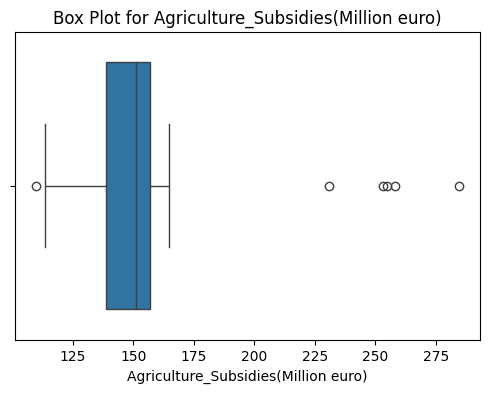

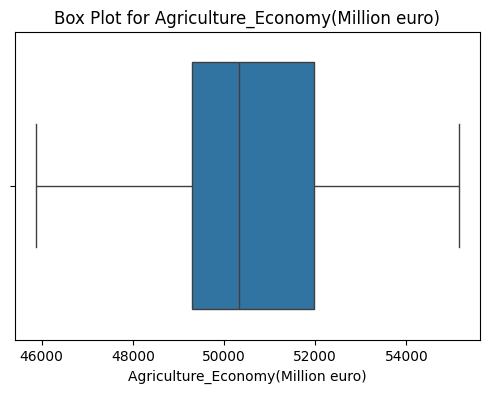

In [6]:
columns=['Crop_Production(1000 ha)',
       'Meat_Production(1000 tonnes)', 'Milk_Production(1000 tonnes)',
       'Crop_Economy(Million euro)', 'Milk_Economy(Million euro)',
       'Animal_Economy(Million euro)', 'Fertilisers_Cost(Million euro)',
       'Plant_Protection_Cost(Million euro)',
       'Agriculture_Subsidies(Million euro)',
       'Agriculture_Economy(Million euro)']

for column in columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[column])
  plt.title(f'Box Plot for {column}')
  plt.show()

### Detecting and Handling Outlier using IQR Method


Function to Detect Outliers Using Interquartile Range (IQR) Method

In [7]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = ((data < lower_bound) | (data > upper_bound))
    return outliers

Checking the Outliers for all columns and to Display the detected ones

In [8]:
outlier_results = {}

for column in df.select_dtypes(include=['float64']).columns:
    outlier_results[column] = detect_outliers_iqr(df[column])

for column, is_outlier in outlier_results.items():
    if is_outlier.any():
        print(f"\nOutliers detected in '{column}':")
        print(df[column][is_outlier])
    else:
        print(f"\nNo outliers detected in '{column}'.")


No outliers detected in 'Crop_Production(1000 ha)'.

No outliers detected in 'Meat_Production(1000 tonnes)'.

No outliers detected in 'Milk_Production(1000 tonnes)'.

No outliers detected in 'Crop_Economy(Million euro)'.

No outliers detected in 'Milk_Economy(Million euro)'.

No outliers detected in 'Animal_Economy(Million euro)'.

No outliers detected in 'Fertilisers_Cost(Million euro)'.

No outliers detected in 'Plant_Protection_Cost(Million euro)'.

Outliers detected in 'Agriculture_Subsidies(Million euro)':
18    253.07
19    254.77
20    258.18
21    230.88
22    284.42
32    109.84
Name: Agriculture_Subsidies(Million euro), dtype: float64

No outliers detected in 'Agriculture_Economy(Million euro)'.


Handling the Detected Outliers Using IQR Capping

In [9]:
Q1 = df['Agriculture_Subsidies(Million euro)'].quantile(0.25)
Q3 = df['Agriculture_Subsidies(Million euro)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Agriculture_Subsidies(Million euro)'] = df['Agriculture_Subsidies(Million euro)'].clip(lower=lower_bound, upper=upper_bound)

df.head()


,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Fertilisers_Cost(Million euro),Plant_Protection_Cost(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro)
0,1982,5344.2,1172.22,8196.20,28506.54,4260.27,14075.92,1672.50,839.12,150.34,45878.96
1,1983,5350.8,1214.53,8338.37,30806.63,4320.04,14272.67,1565.36,905.84,158.50,48355.67
2,1984,5289.3,1252.31,8402.90,28847.94,4341.71,14289.33,1703.82,1038.38,150.69,46485.19
3,1985,4994.1,1270.15,8729.80,29000.62,4380.38,14247.84,1740.23,1036.94,150.50,46623.95
4,1986,5026.3,1242.30,8745.40,29511.79,4352.23,14042.18,1729.79,1125.54,151.39,46996.19


Checking Outliers After fixing them

In [10]:
outlier_results = {}

for column in df.select_dtypes(include=['float64']).columns:
    outlier_results[column] = detect_outliers_iqr(df[column])

for column, is_outlier in outlier_results.items():
    if is_outlier.any():
        print(f"\nOutliers detected in '{column}':")
        print(df[column][is_outlier])
    else:
        print(f"\nNo outliers detected in '{column}'.")


No outliers detected in 'Crop_Production(1000 ha)'.

No outliers detected in 'Meat_Production(1000 tonnes)'.

No outliers detected in 'Milk_Production(1000 tonnes)'.

No outliers detected in 'Crop_Economy(Million euro)'.

No outliers detected in 'Milk_Economy(Million euro)'.

No outliers detected in 'Animal_Economy(Million euro)'.

No outliers detected in 'Fertilisers_Cost(Million euro)'.

No outliers detected in 'Plant_Protection_Cost(Million euro)'.

No outliers detected in 'Agriculture_Subsidies(Million euro)'.

No outliers detected in 'Agriculture_Economy(Million euro)'.


## Explorative Data Analysis (EDA)

*   Correlation Heatmap

*   Mutual Information Scores





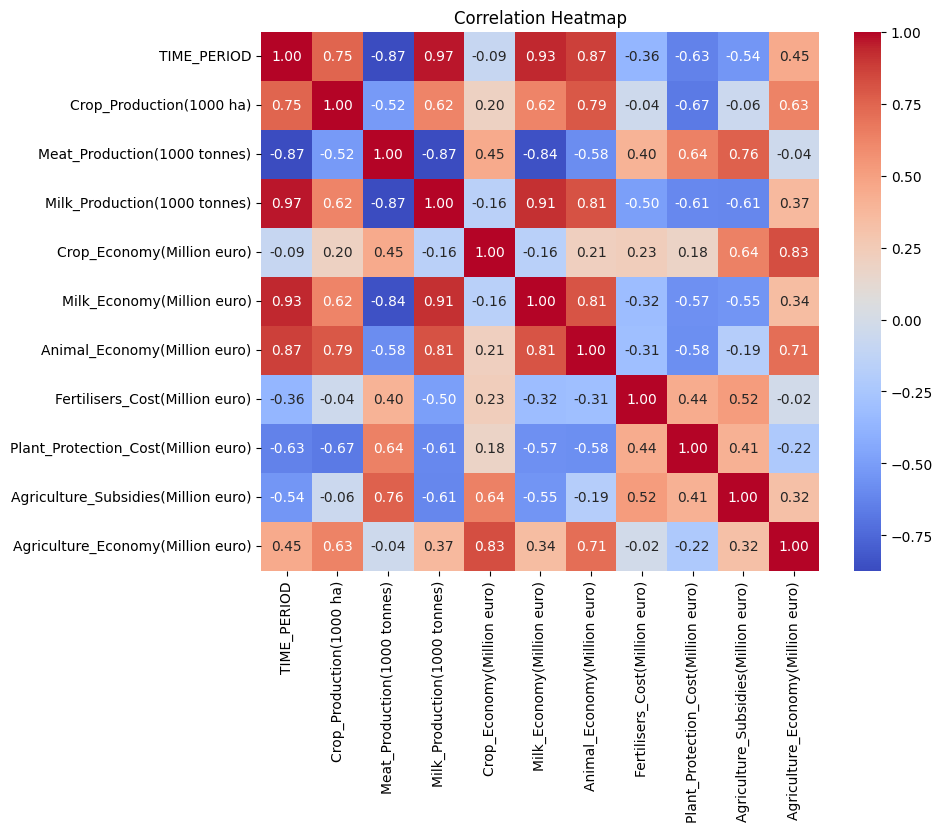

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

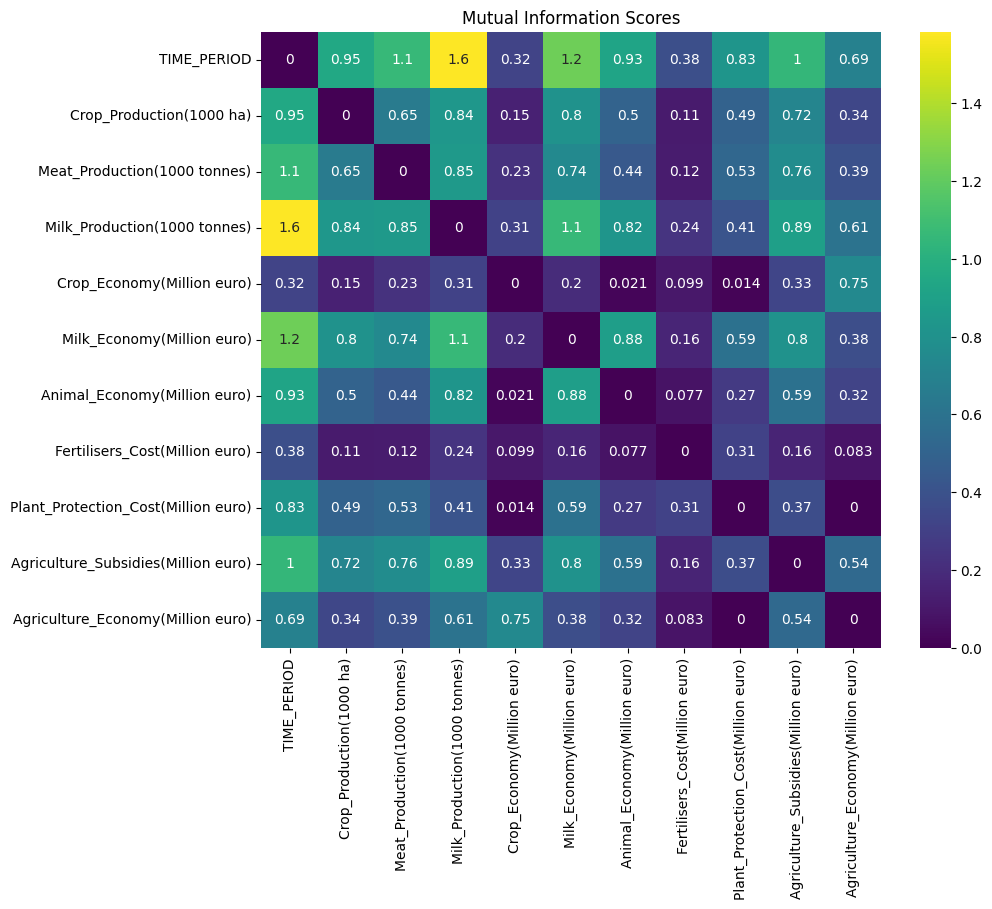

In [12]:
def plot_mutual_information(df):
  X = df.select_dtypes(include=np.number)
  mutual_info_scores = np.zeros((X.shape[1], X.shape[1]))
  for i in range(X.shape[1]):
    for j in range(i + 1, X.shape[1]):
      try:
        mi = mutual_info_regression(X.iloc[:, i].values.reshape(-1, 1), X.iloc[:, j])[0]
        mutual_info_scores[i, j] = mi
        mutual_info_scores[j, i] = mi
      except:
        pass

  plt.figure(figsize=(10, 8))
  sns.heatmap(mutual_info_scores, annot=True, cmap='viridis', xticklabels=X.columns, yticklabels=X.columns)
  plt.title('Mutual Information Scores')
  plt.show()


plot_mutual_information(df)

## Droping features based on both Low correlation and Low mutual information  

Calculate Correlation Matrix

In [13]:
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

Calculate Mutual Information Scores with 'Agriculture_Economy(Million euro)'

In [14]:
X = df.select_dtypes(include=np.number)
target_feature = 'Agriculture_Economy(Million euro)'
mutual_info_scores = {}

for feature in X.columns:
    if feature != target_feature:
        try:
            mi = mutual_info_regression(X[[feature]], X[target_feature])[0]
            mutual_info_scores[feature] = mi
        except:
            pass

Setting Threshold Values

In [15]:
correlation_threshold = 0.3
mutual_info_threshold = 0.1

Identify Low Correlation Features with 'Agriculture_Economy(Million euro)'

In [16]:
low_corr_features = []

for feature in correlation_matrix.columns:
    if feature != target_feature:
        correlation_with_target = correlation_matrix.loc[feature, target_feature]
        if abs(correlation_with_target) < correlation_threshold:
            low_corr_features.append(feature)

Identify Low Mutual Information Features with 'Agriculture_Economy(Million euro)'

In [17]:
low_mi_features = []

for feature, mi_score in mutual_info_scores.items():
    if mi_score < mutual_info_threshold:
        low_mi_features.append(feature)

Finding the Features with both low Correlation and Low Mutual Information

In [18]:
features_to_drop = list(set(low_corr_features) & set(low_mi_features))
print("Features with Low Correlation and Low Mutual Information with", target_feature + ":", features_to_drop)

Features with Low Correlation and Low Mutual Information with Agriculture_Economy(Million euro): ['Plant_Protection_Cost(Million euro)', 'Fertilisers_Cost(Million euro)']


Dropping the Features

In [19]:
df = df.drop(columns=features_to_drop)

## Feature Engineering

Adding New Feature 'Total_Production' which is the Sum of productions

In [20]:
df['Total_Production'] = df['Crop_Production(1000 ha)'] + df['Meat_Production(1000 tonnes)'] + df['Milk_Production(1000 tonnes)']


Adding a Feature 'Subsidies_to_Economy_Ratio' which is a ratio of Agriculture Subsidies to Agriculture Economy

In [21]:
df['Subsidies_to_Economy_Ratio'] = df['Agriculture_Subsidies(Million euro)'] / df['Agriculture_Economy(Million euro)']

Adding a Feature 'Production_to_Economy_Ratio' by talking a ratio of Total Production to Agriculture Economy

In [22]:
df['Production_to_Economy_Ratio'] = df['Total_Production'] / df['Agriculture_Economy(Million euro)']

Adding a Feature 'Impact_of_Economy' by taking the sum of Crop Economy, Milk Economy, Animal Economy and Agriculture Subsidies and dividing by the Agriculture Economy

In [23]:
df['Impact_of_Economy'] = ((df['Crop_Economy(Million euro)'] + df['Milk_Economy(Million euro)'] +
     df['Animal_Economy(Million euro)'] + df['Agriculture_Subsidies(Million euro)']) /  df['Agriculture_Economy(Million euro)'])

Categorize 'Impact_of_Economy' into 'Low', 'Medium', 'High' by Using the method Quantile-based discretization


In [24]:
df['Economic_Impact_Category'] = pd.qcut(df['Impact_of_Economy'], q=3, labels=['Low', 'Medium', 'High'])

In [25]:
df.head()

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro),Total_Production,Subsidies_to_Economy_Ratio,Production_to_Economy_Ratio,Impact_of_Economy,Economic_Impact_Category
0,1982,5344.2,1172.22,8196.20,28506.54,4260.27,14075.92,150.34,45878.96,14712.62,0.003277,0.320683,1.024284,High
1,1983,5350.8,1214.53,8338.37,30806.63,4320.04,14272.67,158.50,48355.67,14903.70,0.003278,0.308210,1.024861,High
2,1984,5289.3,1252.31,8402.90,28847.94,4341.71,14289.33,150.69,46485.19,14944.51,0.003242,0.321490,1.024620,High
3,1985,4994.1,1270.15,8729.80,29000.62,4380.38,14247.84,150.50,46623.95,14994.05,0.003228,0.321595,1.024781,High
4,1986,5026.3,1242.30,8745.40,29511.79,4352.23,14042.18,151.39,46996.19,15014.00,0.003221,0.319473,1.022585,High


## Standardization the dataset

In [26]:
scaler = StandardScaler()
columns_to_check = df.columns.drop(['TIME_PERIOD','Economic_Impact_Category'])

df[columns_to_check] = scaler.fit_transform(df[columns_to_check])

In [27]:
df.head()

,TIME_PERIOD,Crop_Production(1000 ha),Meat_Production(1000 tonnes),Milk_Production(1000 tonnes),Crop_Economy(Million euro),Milk_Economy(Million euro),Animal_Economy(Million euro),Agriculture_Subsidies(Million euro),Agriculture_Economy(Million euro),Total_Production,Subsidies_to_Economy_Ratio,Production_to_Economy_Ratio,Impact_of_Economy,Economic_Impact_Category
0,1982,-1.026509,0.394887,-1.667932,-1.432852,-1.384831,-1.727769,0.052866,-2.078044,-1.235872,0.900352,-1.119119,1.345445,High
1,1983,-1.025598,0.614417,-1.587618,-0.052419,-1.211111,-1.454735,0.496916,-0.932479,-1.212976,0.902994,-1.200005,1.425948,High
2,1984,-1.034086,0.810444,-1.551164,-1.227956,-1.148127,-1.431616,0.071913,-1.797641,-1.208086,0.798368,-1.113891,1.392387,High
3,1985,-1.074827,0.903009,-1.366494,-1.136323,-1.035734,-1.489193,0.061573,-1.733460,-1.202150,0.758616,-1.113205,1.414799,High
4,1986,-1.070383,0.758506,-1.357681,-0.829536,-1.117551,-1.774591,0.110005,-1.561286,-1.199760,0.739411,-1.126970,1.108548,High


## Export to CSV File

In [28]:
df.to_csv('Preprocessed_Data.csv', index=False)